# Code
...
# Imports

In [20]:
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Optional, Tuple, Union
import seaborn as sns
import matplotlib.pyplot as plt

# User Configuration

In [21]:
SAVE_FIGS = True  # Save figures

CIO_FILE = "cio_results.csv"
STATS_FILE = "statistics.csv"

DATA_DIR = Path("results")
OUTPUT_DIR_FIG = Path("figures")
OUTPUT_DIR_FIG.mkdir(parents=True, exist_ok=True)  # ensure output folder exists

# Set my design
sns.set_theme(
    style="white",
    context="paper",
    palette="colorblind",
    rc={
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "font.size": 7,
        "axes.titlesize": 7,
        "axes.labelsize": 7,
        "xtick.labelsize": 7,
        "ytick.labelsize": 7,
        "legend.fontsize": 7
    }
)


# Utility Functions

## Load Data & Assign Correct Datatypes

In [22]:
df_stats = pd.read_csv(DATA_DIR / STATS_FILE, index_col=0, decimal=",", sep=";", encoding="utf-8")
df_cio = pd.read_csv(DATA_DIR / CIO_FILE, index_col=0, decimal=",", sep=";", encoding="utf-8")
print(df_cio.head())
print(df_stats.head())


                   avg_ci_overlap
feature                          
age                      0.000000
temperature              0.536022
heart_rate               0.000000
respiratory_rate         0.000000
oxygen_saturation        0.000000
            statistic    result
feature                        
age              mean  0.978645
age               std  0.988089
age            median  1.000000
temperature      mean  0.999872
temperature       std  0.999429


In [23]:
df_stats = df_stats.reset_index()
df_wide = df_stats.pivot(index='feature', columns='statistic', values='result')
print(df_wide.head())

statistic              mean    median       std
feature                                        
age                0.978645  1.000000  0.988089
diastolic_bp       0.995563  1.000000  0.997600
heart_rate         0.996679  0.980676  0.992629
oxygen_saturation  0.992750  0.980000  0.999507
respiratory_rate   0.996877  1.000000  0.999291


In [24]:
df_cio.rename(columns={'avg_ci_overlap': 'ci_overlap'}, inplace=True)
# print(df_cio.head())

df_combined = df_wide.join(df_cio[['ci_overlap']], how='left')

# print(df_combined.loc['age'])

df_combined['ci_overlap'] = 1-df_combined['ci_overlap']
print(df_combined)

                       mean    median       std  ci_overlap
feature                                                    
age                0.978645  1.000000  0.988089    1.000000
diastolic_bp       0.995563  1.000000  0.997600    1.000000
heart_rate         0.996679  0.980676  0.992629    1.000000
oxygen_saturation  0.992750  0.980000  0.999507    1.000000
respiratory_rate   0.996877  1.000000  0.999291    1.000000
systolic_bp        0.997299  0.977679  0.996995    1.000000
temperature        0.999872  1.000000  0.999429    0.463978


In [25]:
df_formatted = df_combined.style.background_gradient(cmap='Greens', axis=None).format(precision=3)
df_formatted


,mean,median,std,ci_overlap
feature,,,,
age,0.979,1.000,0.988,1.000
diastolic_bp,0.996,1.000,0.998,1.000
heart_rate,0.997,0.981,0.993,1.000
oxygen_saturation,0.993,0.980,1.000,1.000
respiratory_rate,0.997,1.000,0.999,1.000
systolic_bp,0.997,0.978,0.997,1.000
temperature,1.000,1.000,0.999,0.464


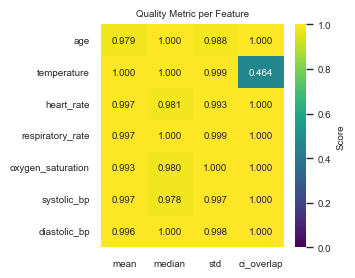

In [27]:
# Optional: Wenn 'feature' noch Index ist, zurück in Spalte
df_plot = df_combined.reset_index()

# Setze 'feature' als Index und sortiere ggf. nach ci_overlap
# df_plot = df_plot.set_index('feature').sort_values('ci_overlap', ascending=False)
df_plot = df_plot.set_index('feature')

feature_order = ['age', 'temperature', 'heart_rate', 'respiratory_rate', 'oxygen_saturation', 'systolic_bp', 'diastolic_bp']  # gewünschte Reihenfolge
df_plot = df_plot.loc[feature_order]


# Erstelle die Heatmap
fig, ax = plt.subplots(figsize=(3.5, 2.8))
# sns.heatmap(df_plot, annot=True, cmap='Greens', vmin=0, vmax=1, fmt=".3f", cbar_kws={'label': 'Score'})
sns.heatmap(df_plot, annot=True, cmap='viridis', vmin=0, vmax=1, fmt=".3f", cbar_kws={'label': 'Score'})
plt.title('Quality Metric per Feature')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
if SAVE_FIGS:
    fig.savefig(OUTPUT_DIR_FIG / f"stats_heatmap.tiff", dpi=300, format='tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
plt.show()
plt.close(fig)